In [1]:
!pip install rembg


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.8 MB/s eta 0:00:00


# Import the Necessary Libraries

In [2]:
from rembg import remove #rembg makes use of a more efficient model called U2-Net for Salient Object Detection
import requests
from PIL import Image
from io import BytesIO
import os

Make the Necessary Directories

In [3]:
os.makedirs('Original_Image',exist_ok=True)
os.makedirs('Masked_Image',exist_ok=True)

Get the Images and store it

In [4]:
#Get the Image from the Internet and store the name
img_url = 'https://ichef.bbci.co.uk/news/976/cpsprodpb/0635/production/_92798510_afp_gomez.jpg'
img_name = img_url.split('/')[-1]
img_name

'_92798510_afp_gomez.jpg'

In [5]:
#Use the Image method to open the Image after requesting through the URL and save it
img = Image.open(BytesIO(requests.get(img_url).content))
original_pic = '/content/Original_Image/'+img_name
img.save(original_pic, format='jpeg')

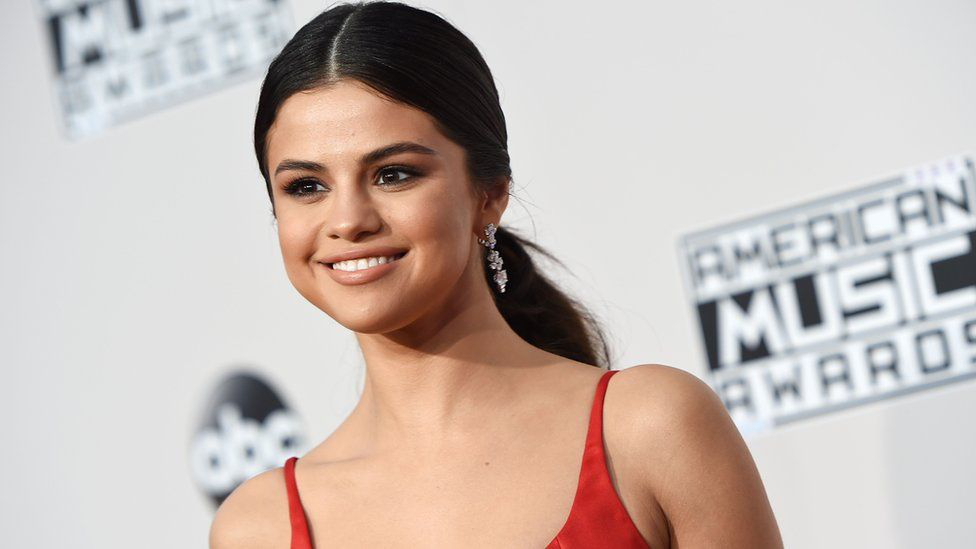

In [6]:
display(img)

In [7]:
masked_pic = '/content/Masked_Image/'+img_name
masked_pic

'/content/Masked_Image/_92798510_afp_gomez.jpg'

Remove the Background and Save it

In [8]:
with open(masked_pic, 'wb') as f:
  input = open(original_pic, 'rb').read()
  subject = remove(input, alpha_matting=True, alpha_matting_foreground_threshold=280)
  f.write(subject)

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 33.3GB/s]


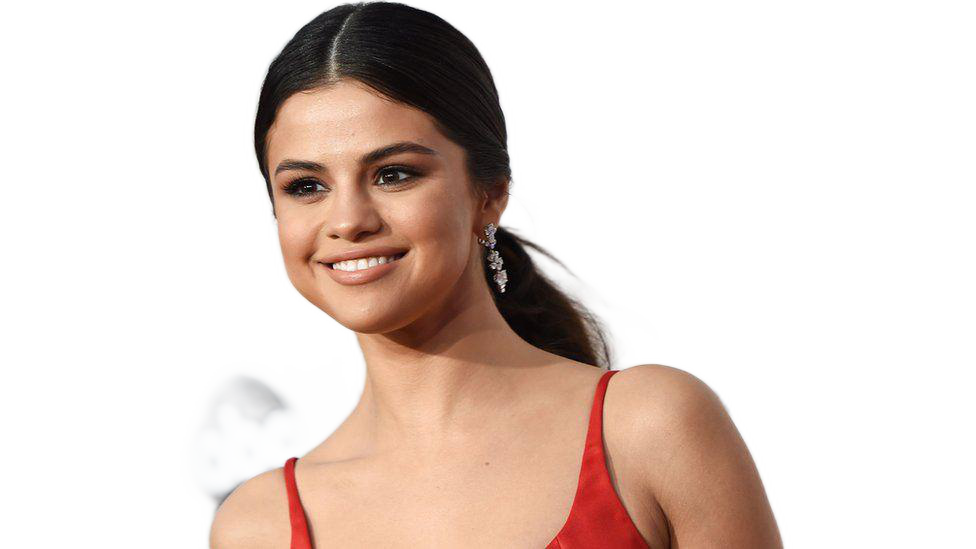

In [9]:
masked_img = Image.open(masked_pic)
display(masked_img)